In [ ]:
!pip install --upgrade pandas_datareader

     |████████████████████████████████| 109 kB 5.2 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [ ]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
tickers = ['CSCO', 'DIS', 'MRK', 'MCD', 'TRV']

rets = pd.DataFrame(
    {ticker:pdr.get_data_yahoo(ticker)['Adj Close'].pct_change() 
      for ticker in tickers}
)

In [ ]:
rets = rets.dropna(how='all').iloc[:-1]

In [ ]:
rets

,CSCO,DIS,MRK,McD,TRV
Date,,,,,
2017-04-17,0.005861,0.005124,0.003035,0.004512,0.011532
2017-04-18,0.001840,0.003604,-0.008440,0.007233,-0.009596
2017-04-19,-0.000612,-0.004028,0.005942,0.002570,-0.002898
2017-04-20,0.005513,0.009320,-0.001436,0.004750,-0.012625
2017-04-21,-0.000305,-0.003049,-0.010552,0.001051,0.001851
...,...,...,...,...,...
2022-04-05,-0.010272,-0.021360,0.002755,0.006806,-0.002365
2022-04-06,-0.010015,-0.022489,0.014931,0.011871,0.006560
2022-04-07,0.004782,-0.005280,0.021537,0.011533,-0.002684


In [ ]:
rets.describe()

,CSCO,DIS,MRK,McD,TRV
count,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000
mean,0.000661,0.000324,0.000522,0.000722,0.000591
std,0.017358,0.018790,0.014308,0.014805,0.017330
min,-0.111850,-0.129846,-0.098630,-0.158753,-0.208004
25%,-0.006703,-0.007835,-0.005905,-0.005006,-0.006211
50%,0.001064,0.000077,0.000266,0.000905,0.001294
75%,0.008353,0.007925,0.007663,0.006960,0.008472
max,0.133735,0.144123,0.083744,0.181254,0.132903


In [ ]:
rets.mean() * 252

CSCO    0.166477
DIS     0.081538
MRK     0.131606
McD     0.181905
TRV     0.149006
dtype: float64

In [ ]:
rets.std()

CSCO    0.017358
DIS     0.018790
MRK     0.014308
McD     0.014805
TRV     0.017330
dtype: float64

$\DeclareMathOperator{\var}{Var}$
$\DeclareMathOperator{\cov}{Cov}$
$\newcommand\E{\mathbb{E}}$


# Forming portfolios

The return on an equal-weighted portfolio of stocks is simply the average return on the individual stocks.

In [ ]:
ewret = rets.mean(axis=1)

In [ ]:
ewret.std()

0.012367252873826751

Suppose we have two assets, $i=\{1,2\}$, each with a return of $R_i$. We hold them in a portfolio with weights $\omega$ and $1-\omega$, respectively. The return on the portfolio is then

$$R_p = \omega R_1 + (1-\omega) R_2.$$

Applying the equations for expected value, we find that the expected return on the portfolio is

$$\E(R_p) = \omega \E(R_1) + (1-\omega) \E(R_2),$$

The variance is

$$\var(R_p) = \omega^2\sigma_1^2 + 2\omega(1-\omega)\sigma_{12} + (1-\omega)^2\sigma_2^2$$

where $\sigma_{ij}:=\cov(r_i,r_j) = \rho_{ij}\sigma_i\sigma_j$.


More generally, if we have $N$ assets with weights $\omega_i$, the variance is

$$\sigma_p^2 = \sum_{i=1}^N \omega_i^2 \sigma_i^2 + \sum_{i=1}^N\sum_{j\neq i}^N \omega_i \omega_j \sigma_{ij}.$$

In vector notation, this is simply

$$\sigma_p^2 = \boldsymbol{\omega}' \boldsymbol{\Sigma} \boldsymbol{\omega},$$

where $\boldsymbol{\omega} = (w_1, \cdots, w_N)'$ is the vector of weights, and $\boldsymbol{\Sigma}$ is the variance–covariance matrix

$$\boldsymbol{\Sigma} := \begin{pmatrix}
\sigma_{11} & \sigma_{12}  & \cdots & \sigma_{1n}\\ 
\sigma_{21} &  \sigma_{22} & \cdots & \sigma_{2n} \\ 
\vdots & \vdots & \ddots & \vdots \\ 
\sigma_{n1} & \sigma_{n2} & \cdots & \sigma_{nn}
\end{pmatrix}.$$

(The “prime” symbol $'$ denotes the vector/matrix transpose.)

In [ ]:
# covariance matrix
Σ = rets.cov()

Σ

,CSCO,DIS,MRK,McD,TRV
CSCO,0.000301,0.000164,0.000107,0.000122,0.000132
DIS,0.000164,0.000353,0.000079,0.000134,0.000144
MRK,0.000107,0.000079,0.000205,0.000087,0.000110
McD,0.000122,0.000134,0.000087,0.000219,0.000144
TRV,0.000132,0.000144,0.000110,0.000144,0.000300


In [ ]:
# weights
w = np.ones(5) / 5

w

array([0.2, 0.2, 0.2, 0.2, 0.2])

In [ ]:
# variance
w.T @ Σ @ w

0.00015294894364517586

In [ ]:
np.sqrt(w.T @ Σ @ w)

0.012367252873826744

Consider the case an equal-weighted portfolio, where each weight is $1/N$. The variance is then

\begin{align*}
\sigma_p^2 &= \sum_{i=1}^N \left(\frac{1}{N}\right)^2 \sigma_i^2 + \sum_{i=1}^N\sum_{j\neq i}^N \left(\frac{1}{N}\right) \left(\frac{1}{N}\right) \sigma_{ij} \\
&= \frac{1}{N} \left(\frac{1}{N}\sum_{i=1}^N \sigma_i^2\right) + \left(\frac{N^2-N}{N^2}\right)\left(\frac{1}{N^2-N}\sum_{i=1}^N\sum_{j\neq i}^N \sigma_{ij}\right) \\
&= \frac{1}{N}(\text{average variance}) + \left(\frac{N-1}{N}\right)(\text{average covariance})
\end{align*}

As $N$ gets large, the first term approaches zero and the second term approaches the average of all the covariance terms. The same sort of thing happens in large portfolios even if they are not equally-weighted because each weight term will tend to be small.

# International indexes

In [ ]:
rets = pd.read_csv('https://raw.githubusercontent.com/stoffprof/qf22/main/data/MSCI_returns.csv',
                   index_col='date', parse_dates=['date'])

rets.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 384 entries, 1990-01-31 to 2021-12-31
Columns: 34 entries, Argentina to USA
dtypes: float64(34)
memory usage: 105.0 KB


In [ ]:
rets.describe()

,Argentina,Australia,Austria,Belgium,Brazil,Canada,Chile,Denmark,Finland,France,...,Portugal,Singapore,Spain,Sweden,Switzerland,Taiwan,Thailand,Turkey,UK,USA
count,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,...,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000
mean,0.013330,0.005386,0.004199,0.003737,0.013246,0.006073,0.006911,0.009384,0.008570,0.005595,...,0.001441,0.004933,0.004918,0.008377,0.007823,0.005428,0.005739,0.009301,0.003440,0.007827
std,0.132010,0.058895,0.076286,0.058527,0.130962,0.054998,0.070479,0.054714,0.085088,0.057353,...,0.063362,0.068382,0.069975,0.069880,0.046501,0.088087,0.099966,0.143451,0.047458,0.042378
min,-0.505322,-0.255683,-0.373359,-0.365554,-0.669332,-0.271550,-0.291079,-0.256723,-0.317711,-0.224328,...,-0.262499,-0.291842,-0.255165,-0.266555,-0.157226,-0.336661,-0.340531,-0.412439,-0.191268,-0.172471
25%,-0.048688,-0.027007,-0.039372,-0.025133,-0.052432,-0.024016,-0.037594,-0.026007,-0.037347,-0.028025,...,-0.035350,-0.025207,-0.034316,-0.030554,-0.016589,-0.045752,-0.041694,-0.076862,-0.025234,-0.017239
50%,0.011591,0.006594,0.010238,0.008415,0.012355,0.008612,0.003222,0.015355,0.003952,0.008572,...,0.001786,0.006835,0.006438,0.008092,0.009430,0.005926,0.005057,0.003863,0.004486,0.011617
75%,0.083622,0.040597,0.052947,0.038908,0.078174,0.039910,0.054894,0.043973,0.056512,0.041392,...,0.043981,0.039810,0.045754,0.049288,0.037714,0.046702,0.053503,0.082935,0.033389,0.033990
max,0.948111,0.169986,0.320633,0.226819,0.812508,0.210092,0.215524,0.182849,0.323702,0.229260,...,0.214636,0.256672,0.294679,0.228124,0.164638,0.464364,0.431842,0.723034,0.164153,0.130219


In [ ]:
rets.columns

Index(['Argentina', 'Australia', 'Austria', 'Belgium', 'Brazil', 'Canada',
       'Chile', 'Denmark', 'Finland', 'France', 'Germany', 'Greece',
       'Hong Kong', 'Indonesia', 'Ireland', 'Italy', 'Japan', 'Korea',
       'Malaysia', 'Mexico', 'Netherlands', 'New Zealand', 'Norway',
       'Philippines', 'Portugal', 'Singapore', 'Spain', 'Sweden',
       'Switzerland', 'Taiwan', 'Thailand', 'Turkey', 'UK', 'USA'],
      dtype='object')

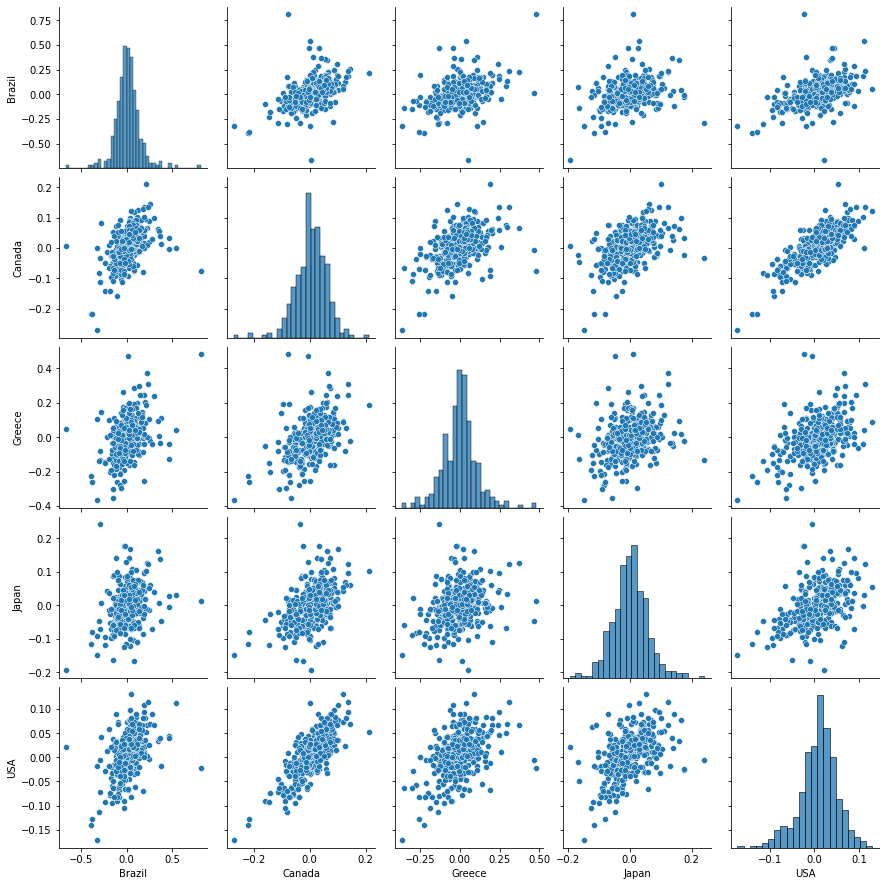

In [ ]:
sns.pairplot(rets[['Brazil', 'Canada', 'Greece', 'Japan', 'USA']])
plt.show()

In [ ]:
rets[['Brazil', 'Canada', 'Greece', 'Japan', 'USA']].std() * np.sqrt(12)

Brazil    0.453665
Canada    0.190518
Greece    0.374040
Japan     0.195707
USA       0.146803
dtype: float64

In [ ]:
rets[['Brazil', 'Canada', 'Greece', 'Japan', 'USA']].corr()

,Brazil,Canada,Greece,Japan,USA
Brazil,1.000000,0.490272,0.393931,0.317773,0.454784
Canada,0.490272,1.000000,0.456136,0.480156,0.783658
Greece,0.393931,0.456136,1.000000,0.289674,0.462819
Japan,0.317773,0.480156,0.289674,1.000000,0.476492
USA,0.454784,0.783658,0.462819,0.476492,1.000000


In [ ]:
rets[['Brazil', 'Canada', 'Greece', 'Japan', 'USA']].mean() * 12

Brazil    0.158951
Canada    0.072880
Greece    0.001079
Japan     0.016715
USA       0.093919
dtype: float64

In [ ]:
# Expected return vector
μ = np.array([0.1, 0.2])

# Volatilities and correlation
σ1 = 0.2
σ2 = 0.3
ρ = 0.2

# Calculate Σ matrix
σ12 = ρ * σ1 * σ2
Σ = np.array([[σ1**2, σ12],
              [σ12,   σ2**2]])

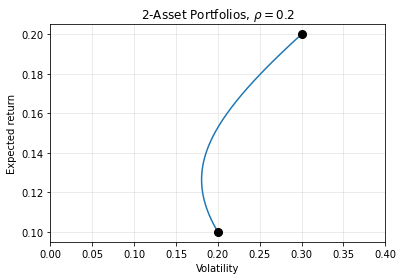

In [ ]:
# Calculate return and volatility for portfolios with varying weights
prets = []
pvars = []
for w1 in np.linspace(0,1,250):
    w = np.array([w1, 1-w1])
    prets.append(w @ μ)
    pvars.append(w @ Σ @ w)
pvols = np.sqrt(np.array(pvars))

# Plot
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(pvols, prets)

# Plot original assets
R1 = (σ1, μ[0])
R2 = (σ2, μ[1])
ax.plot(*R1, 'ko', markersize=8)
ax.plot(*R2, 'ko', markersize=8)

ax.set_xlabel('Volatility')
ax.set_ylabel('Expected return')
ax.set_title(r'2-Asset Portfolios, $\rho={}$'.format(ρ))
ax.set_xlim(0,0.4)
ax.grid(alpha=0.3)
plt.show()

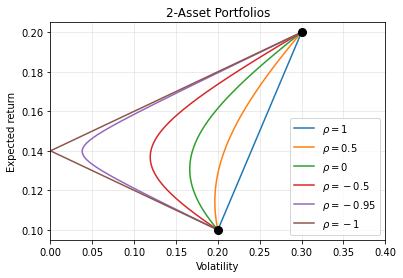

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))

for ρ in [1, 0.5, 0, -0.5, -0.95, -1]:

    # calculate Σ matrix
    σ12 = ρ * σ1 * σ2
    Σ = np.array([[σ1**2, σ12],
                  [σ12,   σ2**2]])

    # calculate return/volatility or portfolios
    prets = []; pvars = []
    for w1 in np.linspace(0,1,250):
        w = np.array([w1, 1-w1])
        prets.append(w @ μ)
        pvars.append(w @ Σ @ w)
    pvols = np.sqrt(np.array(pvars))
    
    ax.plot(pvols, prets, label=r'$\rho={}$'.format(ρ))

# Plot original assets
R1 = (σ1, μ[0])
R2 = (σ2, μ[1])
ax.plot(*R1, 'ko', markersize=8)
ax.plot(*R2, 'ko', markersize=8)

ax.set_xlabel('Volatility')
ax.set_ylabel('Expected return')
ax.set_title('2-Asset Portfolios')
ax.set_xlim(0,0.4)
ax.grid(alpha=0.3)
plt.legend()

plt.show()